<a href="https://colab.research.google.com/github/Donets-Yuliya/DataScience/blob/main/HomeWork6/HomeWork6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузка датасета

In [1]:
#Установка библиотеки Kaggle
!pip install kaggle

In [2]:
from google.colab import files

# Загрузка файла kaggle.json
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
import os
import shutil

# Определяем пути источника и назначения
source_path = 'kaggle.json'
destination_dir = os.path.expanduser('~/.kaggle')
destination_path = os.path.join(destination_dir, 'kaggle.json')

# Создаем директорию назначения, если она не существует
os.makedirs(destination_dir, exist_ok=True)

# Перемещаем файл
shutil.move(source_path, destination_path)

# Устанавливаем права доступа
os.chmod(destination_path, 0o600)

In [28]:
# Kaggle API для загрузки датасета:
!kaggle datasets download -d adilshamim8/student-performance-and-learning-style

Dataset URL: https://www.kaggle.com/datasets/adilshamim8/student-performance-and-learning-style
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/77.0k [00:00<?, ?B/s]
100% 77.0k/77.0k [00:00<00:00, 232MB/s]


In [29]:
# Распаковка архива:
import zipfile

with zipfile.ZipFile('student-performance-and-learning-style.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [33]:
import pandas as pd

# Загрузка файла в датасет
df = pd.read_csv('student_performance.csv')

In [34]:
# Получаем общую информацию о датасете
print(df.info())

# Датасет содержит информацию по успеваемости и поведению учащихся со следующими колонками:
# StudyHours - количество учебных часов в неделю (+)
# Attendance - процент посещенных занятий (+)
# Resources - наличие и использование академических ресурсов (например, библиотеки, заметки)
# Extracurricular - участие во внеклассных мероприятиях (+)
# Motivation - самооценка уровня мотивации
# Internet - доступ к Интернету в учебных целях
# Gender - пол учащегося (мужской/женский)
# Age - возраст студента (18–30 лет)
# LearningStyle - предпочтительный стиль обучения (например, визуальный, слуховой, кинестетический, чтение/письмо)
# OnlineCourses - участие в онлайн-курсах
# Discussions - участие в обсуждениях в учебных группах или на форумах
# AssignmentCompletion - показатель своевременного выполнения заданий (+)
# ExamScore - балл, полученный на основном экзамене (+)
# EduTech - использование инструментов/платформ образовательных технологий
# StressLevel - уровень стресса, оцененный учащимся (+)
# FinalGrade - итоговая оценка курса

# Видим, что всего 14003 строк, отсутствуют пустые значения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14003 entries, 0 to 14002
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   StudyHours            14003 non-null  int64
 1   Attendance            14003 non-null  int64
 2   Resources             14003 non-null  int64
 3   Extracurricular       14003 non-null  int64
 4   Motivation            14003 non-null  int64
 5   Internet              14003 non-null  int64
 6   Gender                14003 non-null  int64
 7   Age                   14003 non-null  int64
 8   LearningStyle         14003 non-null  int64
 9   OnlineCourses         14003 non-null  int64
 10  Discussions           14003 non-null  int64
 11  AssignmentCompletion  14003 non-null  int64
 12  ExamScore             14003 non-null  int64
 13  EduTech               14003 non-null  int64
 14  StressLevel           14003 non-null  int64
 15  FinalGrade            14003 non-null  int64
dtypes: i

Поставим себе задачу сделать сегментацию студентов по уровню стресса и успеваемости

In [38]:
# Оставим только нужные характеристики
features = ['StressLevel', 'ExamScore', 'AssignmentCompletion', 'Attendance', 'Extracurricular', 'StudyHours']
X = df[features].copy()

In [39]:
# Смотрим первые строки датасета
print(X.head())

   StressLevel  ExamScore  AssignmentCompletion  Attendance  Extracurricular  \
0            1         40                    59          64                0   
1            1         66                    90          64                0   
2            1         99                    67          64                0   
3            1         40                    59          64                1   
4            1         66                    90          64                1   

   StudyHours  
0          19  
1          19  
2          19  
3          19  
4          19  


        StressLevel     ExamScore  AssignmentCompletion    Attendance  \
count  14003.000000  14003.000000          14003.000000  14003.000000   
mean       1.304363     70.346926             74.502535     80.194316   
std        0.785383     17.688113             14.632177     11.472181   
min        0.000000     40.000000             50.000000     60.000000   
25%        1.000000     55.000000             62.000000     70.000000   
50%        2.000000     70.000000             74.000000     80.000000   
75%        2.000000     86.000000             87.000000     90.000000   
max        2.000000    100.000000            100.000000    100.000000   

       Extracurricular    StudyHours  
count     14003.000000  14003.000000  
mean          0.594158     19.987431  
std           0.491072      5.890637  
min           0.000000      5.000000  
25%           0.000000     16.000000  
50%           1.000000     20.000000  
75%           1.000000     24.000000  
max           1.000000     44.

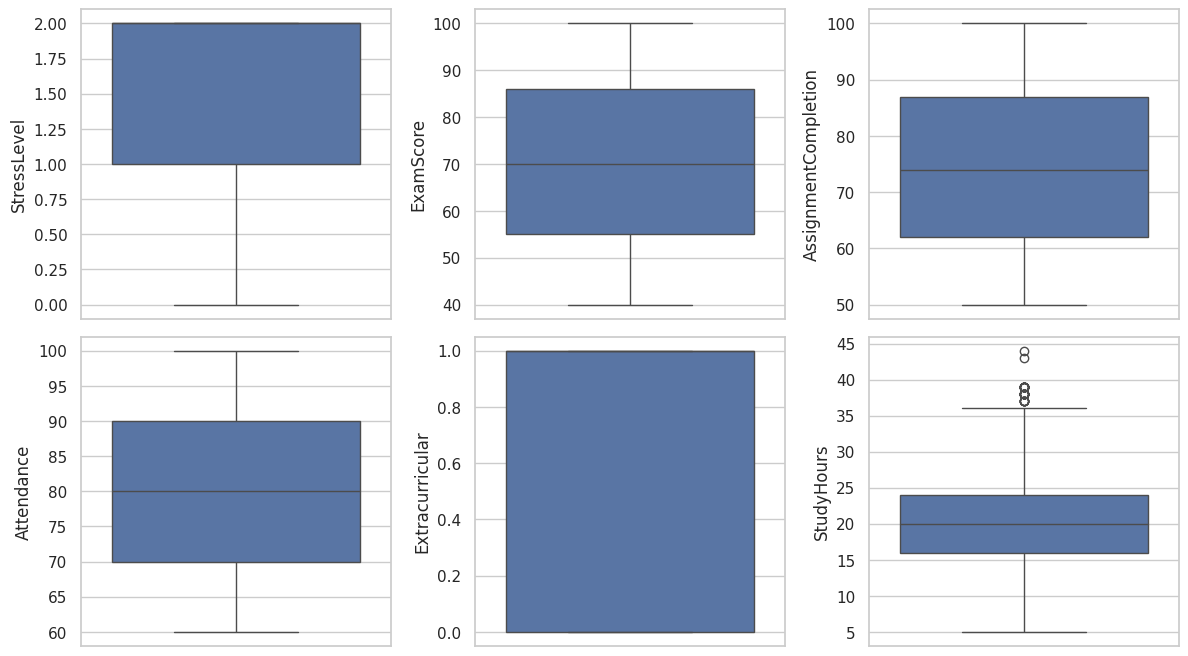

In [43]:
# Выводим статистические данные о числовых столбцах
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

print(X.describe())

# Визуализация ящик с усами
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

# Перебираем каждый числовой столбец и создаем для него ящик с усами
for index, column in enumerate(X.select_dtypes(include=[np.number]).columns):
  plt.subplot((len(X.columns) // 3) + 1, 3, index + 1)
  sns.boxplot(y=X[column])

plt.tight_layout()
plt.show()

# Значения StressLevel смещены вверх (к максимальному)
# Есть выбросы в колонке StudyHours
# ExamScore, AssignmentCompletion, Attendance распределены равномерно

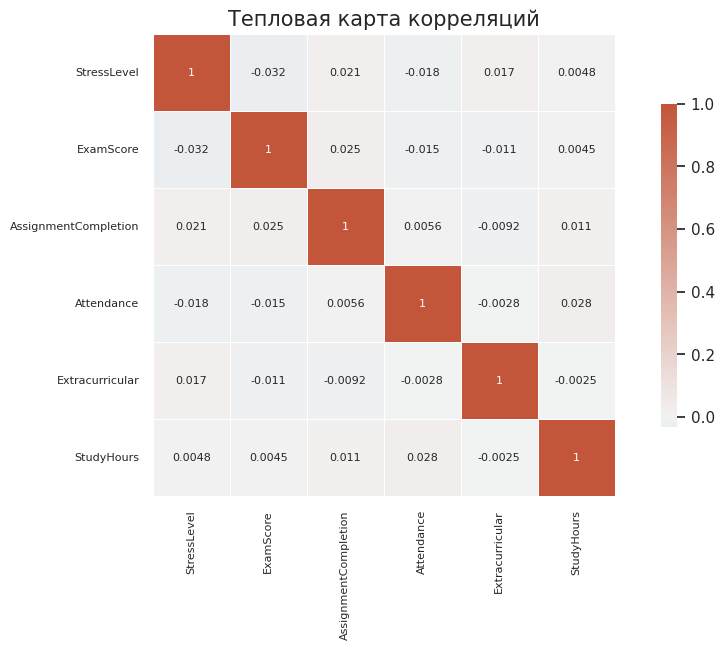

In [44]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Тепловая карта
numeric_df = X.select_dtypes(include=[np.number])  # Исключаем нечисловые столбцы
corr = numeric_df.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(12, 6))
plt.title('Тепловая карта корреляций', fontsize=15)

sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.7}, annot=True,
            annot_kws={"size": 8})
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

# Низкая корреляция. Максимальное и минимальное значение (кроме диагонали): 0.028 и -0.032

Предобработка

In [49]:
from sklearn.preprocessing import StandardScaler

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Обучение модели

Количество кластеров: 2, Silhouette Score: 0.3124, Davies-Bouldin Index: 1.2654, Inertia: 19517.6731, Calinski-Harabasz Index: 6836.1101


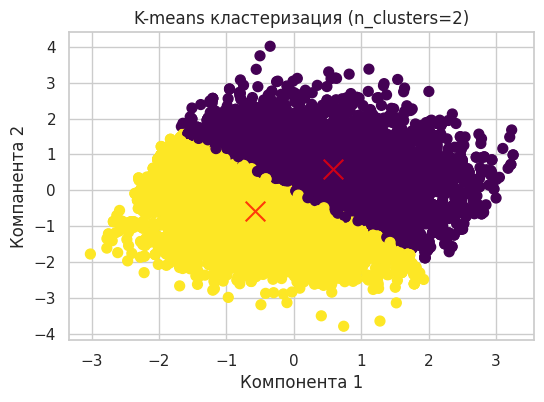

Количество кластеров: 3, Silhouette Score: 0.3389, Davies-Bouldin Index: 0.9256, Inertia: 12856.5724, Calinski-Harabasz Index: 8815.6737


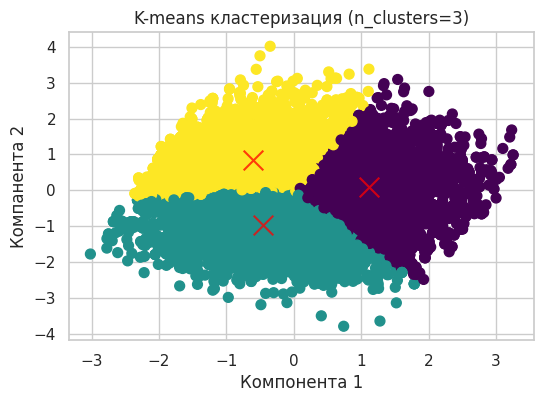

Количество кластеров: 4, Silhouette Score: 0.3128, Davies-Bouldin Index: 0.9310, Inertia: 10120.3864, Calinski-Harabasz Index: 8726.9207


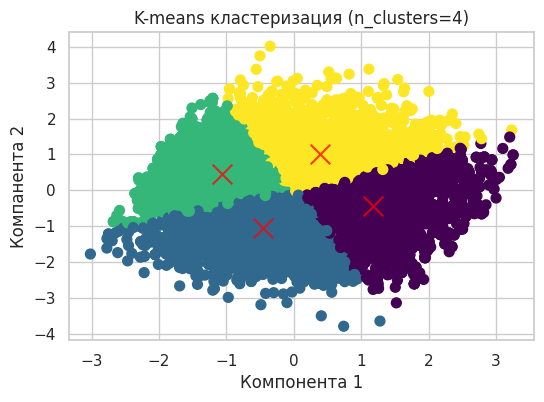

Количество кластеров: 5, Silhouette Score: 0.3099, Davies-Bouldin Index: 0.9795, Inertia: 8333.4063, Calinski-Harabasz Index: 8698.8258


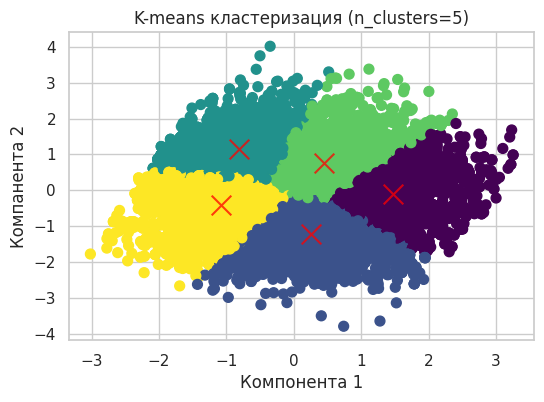

Количество кластеров: 6, Silhouette Score: 0.3287, Davies-Bouldin Index: 0.8484, Inertia: 6856.7173, Calinski-Harabasz Index: 9059.7970


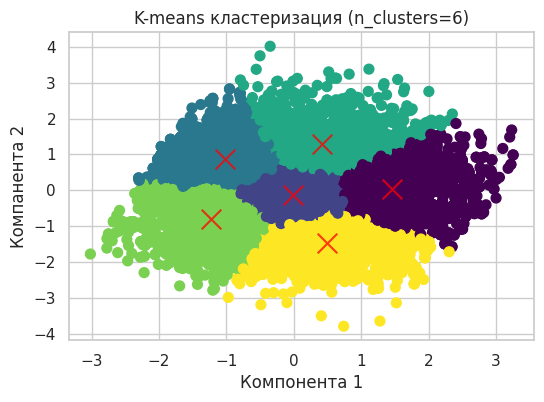

Количество кластеров: 7, Silhouette Score: 0.3234, Davies-Bouldin Index: 0.8623, Inertia: 5958.0687, Calinski-Harabasz Index: 9039.8756


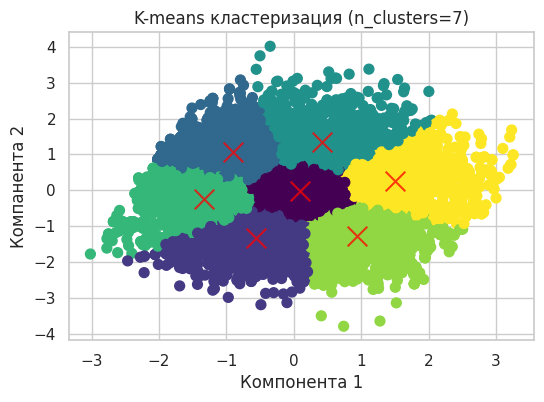

Количество кластеров: 8, Silhouette Score: 0.3211, Davies-Bouldin Index: 0.8584, Inertia: 5293.3078, Calinski-Harabasz Index: 8972.1677


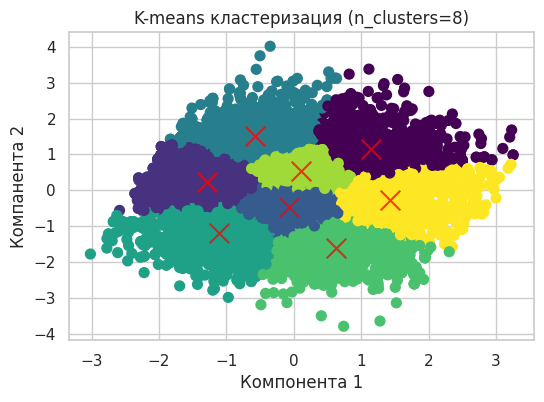

Количество кластеров: 9, Silhouette Score: 0.3226, Davies-Bouldin Index: 0.8765, Inertia: 4778.9630, Calinski-Harabasz Index: 8883.0622


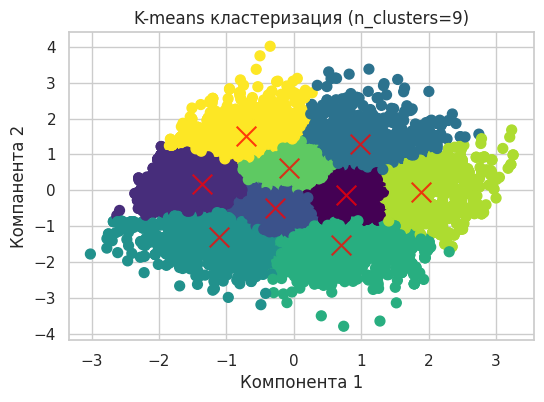

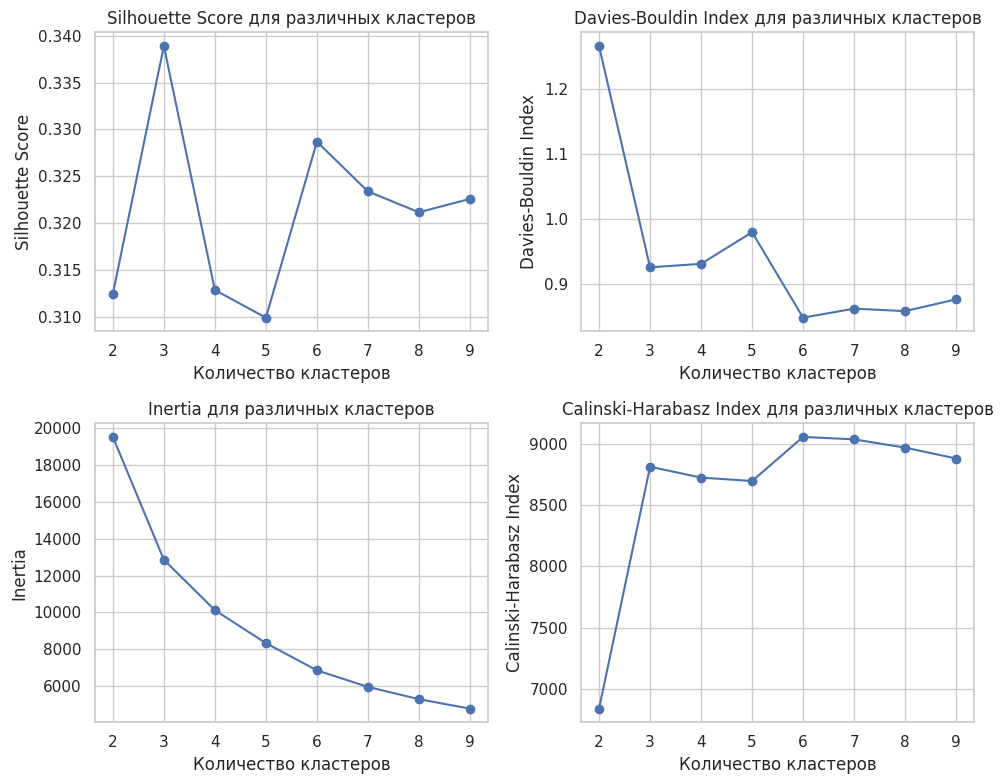

In [55]:
# К-Means
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA

# Преобразовываем 6 признаков в 2 главные компоненты (линейные зависимости от признаков)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Списки для хранения значений метрик
silhouette_scores = []
davies_bouldin_scores = []
inertia_scores = []
calinski_harabasz_scores = []

# Проверка качества кластеризации для разного числа кластеров
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_pca)

    # Оценка метрик
    silhouette_avg = silhouette_score(X_pca, labels)
    davies_bouldin = davies_bouldin_score(X_pca, labels)
    inertia = kmeans.inertia_
    calinski_harabasz = calinski_harabasz_score(X_pca, labels)

    silhouette_scores.append(silhouette_avg)
    davies_bouldin_scores.append(davies_bouldin)
    inertia_scores.append(inertia)
    calinski_harabasz_scores.append(calinski_harabasz)

    print(f"Количество кластеров: {n_clusters}, Silhouette Score: {silhouette_avg:.4f}, Davies-Bouldin Index: {davies_bouldin:.4f}, Inertia: {inertia:.4f}, Calinski-Harabasz Index: {calinski_harabasz:.4f}")

    # Визуализация кластеров
    plt.figure(figsize=(6, 4))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap='viridis')

    # Отображение центров кластеров
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')

    plt.title(f"K-means кластеризация (n_clusters={n_clusters})")
    plt.xlabel("Компонента 1")
    plt.ylabel("Компанента 2")
    plt.show()

# Визуализация изменения метрик
plt.figure(figsize=(10, 8))

# Silhouette Score (Индекс Силуэт)
plt.subplot(2, 2, 1)
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score для различных кластеров')

# Davies-Bouldin Index (Индекс Дэвиса-Болдуина)
plt.subplot(2, 2, 2)
plt.plot(range(2, 10), davies_bouldin_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index для различных кластеров')

# Inertia (Сумма внутрикластерных расстояний)
plt.subplot(2, 2, 3)
plt.plot(range(2, 10), inertia_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Inertia для различных кластеров')

# Calinski-Harabasz Index (Коэффициент Кэллински-Харабаза)
plt.subplot(2, 2, 4)
plt.plot(range(2, 10), calinski_harabasz_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index для различных кластеров')

plt.tight_layout()
plt.show()

# Если анализировать графики методов оценки качества можно увидеть следующее:
# По методу силуэта максимальное значение приходится на 3 кластера, также присутствует некоторое увеличение при 6 кластерах
# По методу Дэвиса-Болдуина минимальное значение приходится на 6 кластеров, резкий скачок вниз происходит при 3 кластерах
# По методу локтя не видно очевидного слома, но самый большой слом приходится на 3 кластер
# По методу Кэллински-Харабаза максимальное значение приходится на 6 кластеров, резкий скачок вверх происходит при 3 кластерах

# Учитывая, что мы хотим разделить студентов по уровню стресса и успеваемости, будет достаточно 3 кластеров

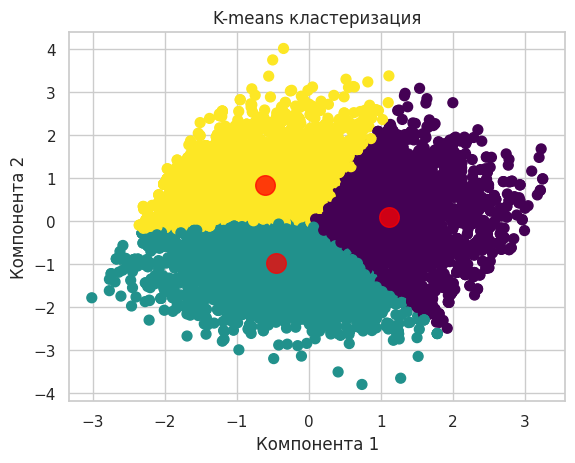

         StressLevel  ExamScore  AssignmentCompletion  Attendance  \
Cluster                                                             
0           0.834509  81.277435             78.760247   84.059938   
1           1.355329  71.673974             70.250705   71.735837   
2           1.694936  58.877933             74.557431   84.604776   

         Extracurricular  StudyHours  
Cluster                               
0               0.368444   21.792860  
1               0.649881   15.749512  
2               0.752161   22.319885  


In [57]:
# Пересчитываем только для 3 кластеров
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Инициализируем модель KMeans с 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=42)

# Обучаем модель
kmeans.fit(X_pca)

# Предсказываем кластеры
y_kmeans = kmeans.predict(X_pca)

# Добавление меток кластеров в DataFrame
X['Cluster'] = y_kmeans

# Визуализируем результаты
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Отображаем центры кластеров
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title("K-means кластеризация")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.show()

# Анализ средних значений признаков по кластерам
cluster_means = X.groupby('Cluster')[features].mean()
print(cluster_means)

# В кластер 0 попадают студенты с низким уровнем стресса,
#                                 высокой успеваемостью,
#                                 высоким уровнем своевременного выполнения заданий,
#                                 высоким процентом посещаемости занятий,
#                                 низким уровнем внеклассных занятий,
#                                 средним количеством часов для обучения
# В кластер 1 попадают студенты со средним уровнем стресса,
#                                  средней успеваемостью,
#                                  низким уровнем своевременного выполнения заданий,
#                                  низким процентом посещаемости занятий,
#                                  средним количеством внеклассных занятий,
#                                  низким количеством часов для обучения
# В кластер 2 попадают студенты с высоким уровнем стресса,
#                                 низкой успеваемостью,
#                                 средним уровнем своевременного выполнения заданий,
#                                 высоким процентом посещаемости занятий,
#                                 высоким количеством внеклассных занятий,
#                                 высоким количеством часов для обучения

Данное разделение может быть полезным для составления рекомендаций группам студентов: уменьшение количества внеклассных занятий, снижение уровня стресса (походы к психологу, групповая терапия), дополнительные рекомендации по отдыху и учебе и т.п.